In [1]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def read_skeleton_file(filename): # อ่านไฟล์ .skeleton
    with open(filename, 'r') as f:
        lines = f.readlines()

    index = 0
    num_frames = int(lines[index].strip()); index += 1
    data = []

    for _ in range(num_frames):
        frame = {}
        num_bodies = int(lines[index].strip()); index += 1
        frame['bodies'] = []

        for _ in range(num_bodies):
            body_id_line = lines[index].strip(); index += 1
            while not lines[index].strip().isdigit():
                index += 1

            num_joints = int(lines[index].strip()); index += 1
            joints = []

            for _ in range(num_joints):
                parts = lines[index].strip().split()
                x, y, z = map(float, parts[:3])
                joints.append((x, y, z))
                index += 1

            frame['bodies'].append({'joints': joints})

        data.append(frame)

    return data

In [ ]:
def visualize_pose(joints): # วาดท่าทางจากจุด 3 มิติในเฟรมเดียว joints: list of (x, y, z) สำหรับ 25 จุด
    ''' 
    แกน         ช่วงค่าปกติโดยประมาณ   ความหมาย
    x           ~ -1.0 ถึง 1.0       ซ้าย <-> ขวา (ถ้าตัวอยู่กลางจะใกล้ 0)
    y           ~ -1.5 ถึง 1.5       ล่าง ↕ บน (ขึ้นบนมากขึ้น)
    z           ~ 0.5 ถึง 4.5        ใกล้ ↔ ไกล (กล้องอยู่ที่ z = 0)
    '''
    xs, ys, zs = zip(*joints)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs, ys, zs, c='r')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Pose')
    plt.show()

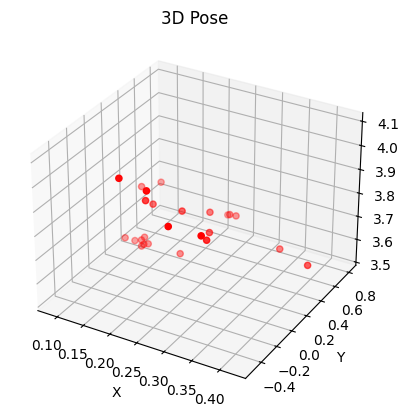

In [4]:
if __name__ == '__main__':
    filename = "/Users/balast/Desktop/LiftingProject/LiftingDetection/ActionRecognition/notebooks/DataTest/S001C001P001R001A001.skeleton"
    skeleton_data = read_skeleton_file(filename)
    
    frame = 0 # เฟรมแรก 
    joints = skeleton_data[0]['bodies'][0]['joints']
    visualize_pose(joints)